Análisis de texto en tweets

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\isaja\Documents\dcc\e\crisis\data\crisis_texts_dataset.csv"
df = pd.read_csv(file_path, sep=',', encoding='utf-8')
df.head(100)

,tweet_id,text_info,text_info_conf,tweet_text
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
3,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
4,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...
...,...,...,...,...
95,917830152159092736,informative,1.0000,"RT @CityLab: ""Diablo winds"" are sparking massi..."
96,917830920907890688,not_informative,0.6833,RT @FFBehavior: California Working. All of it....
97,917831645218136065,informative,0.6466,"As Wildfires Spread Through California, Find O..."
98,917831909111222272,not_informative,1.0000,An Inferno Like You've Never Seen: Deadly Wild...


Análisis de texto informativo

In [33]:
df_informative = df[df['text_info']=='informative'].copy()
df_informative.head(100)

,tweet_id,text_info,text_info_conf,tweet_text
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
3,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
4,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...
...,...,...,...,...
114,917835421073031168,informative,0.6724,Cincinnati couple escapes California wildfires...
115,917836387155677185,informative,0.6615,RT @mashable: Striking satellite images show s...
116,917836899410235392,informative,0.6549,Smoke and flame rise from the Hilton Sonoma Wi...
117,917836981291413507,informative,1.0000,Wildfires Sweep Across Northern California; 15...


In [74]:
# Muestra aleatoria de textos de los tweets informativos
import random
random_state = random.randint(0, 10000)
sample_texts = df_informative['tweet_text'].sample(100, random_state=random_state)
print("\n======Muestra aleatoria de textos informativos======")
for i, text in enumerate(sample_texts, 1):
    print(f"{text}")


======Muestra aleatoria de textos informativos======
RT @jorge_guajardo: Mexico City airport after today's earthquake. https://t.co/5UKQ54WLAz
HURRICANE MARIA: Cash crunch slowed Puerto Rico's appeal for grid help, CEO says | EE News https://t.co/sPh2l2RoL9 https://t.co/oR0D2sA0Cz
Storm watches issued as Maria moves up the East Coast https://t.co/05TE5PEKmZ https://t.co/OM2u6l1Cwf
Puerto Rican #CreditUnion CEO Says 'Pray For Us' After #HurricaneMaria https://t.co/jdnsO4MBzs https://t.co/5KAOTT5Ds3
FTL beach @ A1A &amp; Sunrise Blvd 1 week after #Irma. Sand dunes created like snow drifts. Highway plowed to clear a‚Ä¶ https://t.co/QtyvbcjILD
Latest on Post-Tropical Cyclone #Ophelia &amp; California Wildfires Weather updates: https://t.co/QRjvQZrPWn #StormHour https://t.co/1iuG3WC3Uf
RAW: Neighbors seek rescue by boat during Harvey flooding https://t.co/ddDztlvG75 https://t.co/W4j94bTyJn
Mexico hit by a new 6.1-magnitude earthquake - Irish Times https://t.co/tOBozjRQgh #TopStories https:

In [45]:
# Adición de columnas con características de los textos
df_informative['text_length'] = df_informative['tweet_text'].apply(len)
df_informative['word_count'] = df_informative['tweet_text'].apply(lambda x: len(x.split()))
df_informative['rt'] = df_informative['tweet_text'].apply(lambda x: 1 if x.startswith('RT') else 0)
df_informative['has_url'] = df_informative['tweet_text'].apply(lambda x: 1 if 'http' in x or 'https' in x else 0)
df_informative['hashtag_count'] = df_informative['tweet_text'].apply(lambda x: x.count('#'))
df_informative['mention_count'] = df_informative['tweet_text'].apply(lambda x: x.count('@'))
df_informative.head(128000)

,tweet_id,text_info,text_info_conf,tweet_text,text_length,word_count,rt,has_url,hashtag_count,mention_count
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...,120,11,1,1,0,1
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...,91,8,0,1,0,0
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,128,13,1,1,0,1
3,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,128,13,1,1,0,1
4,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...,120,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
18077,916105333872918528,informative,1.0000,Carlos santana donates $100k to mexico earthqu...,114,12,0,1,0,0
18078,916105374134042624,informative,1.0000,Seth troxler donates 10k to earthquake relief ...,135,15,0,1,0,0
18079,916112796194021376,informative,1.0000,Entercom/San Francisco Stations Raise Funds Fo...,123,11,0,1,0,0
18080,916164076484653056,informative,0.6580,Mexico Earthquakes | International Medical Cor...,111,9,0,1,0,1


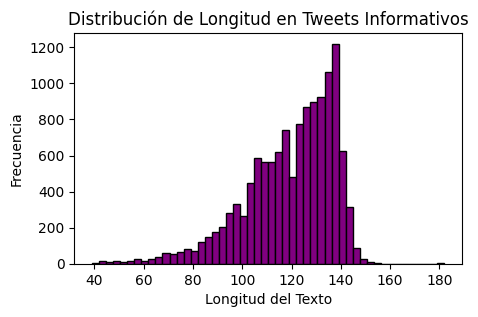

In [96]:
# Gráficos de distribución de las características

# Distribución de la longitud del texto
plt.figure(figsize=(5, 3))
plt.hist(df_informative['text_length'], bins=50, color='purple', edgecolor='black')
plt.title('Distribución de Longitud en Tweets Informativos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

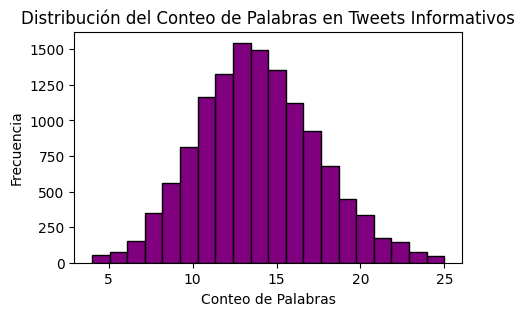

In [98]:
# Distribución del conteo de palabras
plt.figure(figsize=(5, 3))
plt.hist(df_informative['word_count'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Palabras en Tweets Informativos')
plt.xlabel('Conteo de Palabras')
plt.ylabel('Frecuencia')
plt.show()

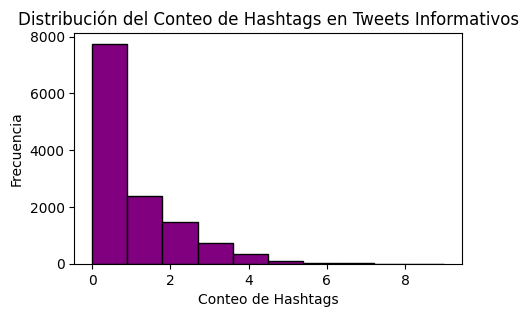

In [101]:
# Distribución del conteo de hashtags
plt.figure(figsize=(5, 3))
plt.hist(df_informative['hashtag_count'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Hashtags en Tweets Informativos')
plt.xlabel('Conteo de Hashtags')
plt.ylabel('Frecuencia')
plt.show()

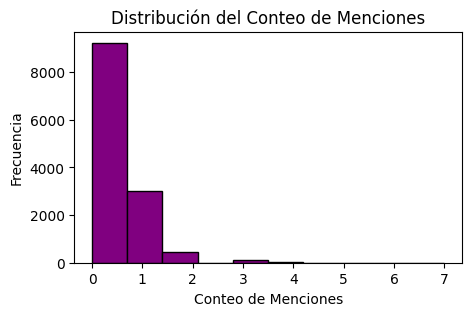

In [22]:
# Distribución del conteo de menciones
plt.figure(figsize=(5, 3))
plt.hist(df_informative['mention_count'], color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Menciones')
plt.xlabel('Conteo de Menciones')
plt.ylabel('Frecuencia')
plt.show()

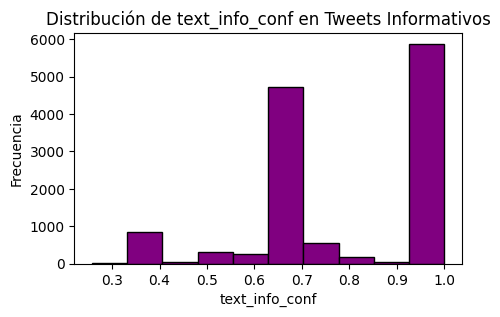

In [106]:
# Distribución de text_info_conf
plt.figure(figsize=(5, 3))
plt.hist(df_informative['text_info_conf'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución de text_info_conf en Tweets Informativos')
plt.xlabel('text_info_conf')
plt.ylabel('Frecuencia')
plt.show()

In [88]:
# Conteo total de tweets informativos
total_informative_tweets = df_informative.shape[0]
print("Número total de tweets informativos:", total_informative_tweets)

# Conteo de tweets informativos con URL
has_url = df_informative['has_url'].value_counts()[1]
print("\nNúmero de tweets informativos con URL:", has_url)
percent_with_url = has_url / total_informative_tweets
print(f"Porcentaje de tweets informativos con URL: {percent_with_url:.2%}")

# Conteo de retweets informativos
retweets = df_informative['rt'].value_counts()[1]
print("\nNúmero de retweets informativos:", retweets)
percent_retweets = retweets / total_informative_tweets
print(f"Porcentaje de retweets informativos: {percent_retweets:.2%}")

# Conteo de tweets informativos con hashtags
no_hashtags = df_informative['hashtag_count'].value_counts()[0]
tweets_with_hashtags = total_informative_tweets - no_hashtags
print("\nNúmero de tweets informativos con hashtags:", tweets_with_hashtags)
percent_with_hashtags = tweets_with_hashtags / total_informative_tweets
print(f"Porcentaje de tweets informativos con hashtags: {percent_with_hashtags:.2%}")


Número total de tweets informativos: 12855

Número de tweets informativos con URL: 12855
Porcentaje de tweets informativos con URL: 100.00%

Número de retweets informativos: 1956
Porcentaje de retweets informativos: 15.22%

Número de tweets informativos con hashtags: 5108
Porcentaje de tweets informativos con hashtags: 39.74%


Análisis de textos no informativos

In [90]:
df_non_informative = df[df['text_info']=='not_informative'].copy()
df_non_informative.head(100)

,tweet_id,text_info,text_info_conf,tweet_text
11,917793736918216706,not_informative,0.6535,California wildfire. á½¡4 https://t.co/a8oD5rkDdI
56,917821459321556992,not_informative,1.0000,"Thinking of all my California loved ones, frie..."
58,917822562259931137,not_informative,0.7023,RT @Rincon_Music: (Radio Reports On California...
62,917825152636907523,not_informative,0.7023,RT @NBCNews: JUST IN: President Trump approves...
64,917825267136995328,not_informative,0.6894,RT @NBCSports: Olympic champion loses gold med...
...,...,...,...,...
496,919566012604874754,not_informative,1.0000,RT @CringeyPops: tf california why don't you j...
505,919574683934183424,not_informative,0.6896,A selection of Sunday front pages focusing on ...
511,919578094398144513,not_informative,0.6740,During our Summer long research on the #IRCURV...
512,919578094398144513,not_informative,0.6499,During our Summer long research on the #IRCURV...


In [91]:
# Muestra aleatoria de textos de los tweets no informativos
import random
random_state = random.randint(0, 10000)
sample_texts = df_non_informative['tweet_text'].sample(100, random_state=random_state)
print("\n======Muestra aleatoria de textos no informativos======")
for i, text in enumerate(sample_texts, 1):
    print(f"{text}")


======Muestra aleatoria de textos no informativos======
RT @_eboniiiii: OCTOBER 1st . Get your tix now!!! https://t.co/Z8MLdT60Qi https://t.co/eMQV08Pk9d
#MONEY #IRMA FoxBusiness Emmys ratings crater; Trump-bashing to blame? https://t.co/ph0WHOx6N6 #FoxNews https://t.co/66LF0s1KM0 — FOX B…
Tourism Sector in Porto Rico - Still Suffer After the Hurricane ... https://t.co/UbyxBcA5v8 https://t.co/nI8TbXTC9B
Forecast track of #HurricaneMaria Freud said sometimes a cigar is just a cigar. https://t.co/ZnH55kUX9J
Harvey all over Industrial Production ---&gt; Read More: https://t.co/gYDmrIGQjv https://t.co/QRrSxE7dxZ
3x13 ~ 4x13 ~ 7x10 donna's the only person who knows what kind of gift harvey would like to get https://t.co/ChT9rXwG20
Trumpâ€™s taste for flattery is a disaster for Puerto Rico â€” and someday the world https://t.co/6NbL6VpXvt
Google search trends in the US vs. Puerto Rico https://t.co/QlchBXaQic https://t.co/OIY7GtPmdt
The heightened risk that Puerto Rico will become a new base

In [92]:
# Adición de columnas con características de los textos
df_non_informative['text_length'] = df_non_informative['tweet_text'].apply(len)
df_non_informative['word_count'] = df_non_informative['tweet_text'].apply(lambda x: len(x.split()))
df_non_informative['rt'] = df_non_informative['tweet_text'].apply(lambda x: 1 if x.startswith('RT') else 0)
df_non_informative['has_url'] = df_non_informative['tweet_text'].apply(lambda x: 1 if 'http' in x or 'https' in x else 0)
df_non_informative['hashtag_count'] = df_non_informative['tweet_text'].apply(lambda x: x.count('#'))
df_non_informative['mention_count'] = df_non_informative['tweet_text'].apply(lambda x: x.count('@'))
df_non_informative.head(128000)

,tweet_id,text_info,text_info_conf,tweet_text,text_length,word_count,rt,has_url,hashtag_count,mention_count
11,917793736918216706,not_informative,0.6535,California wildfire. á½¡4 https://t.co/a8oD5rkDdI,49,4,0,1,0,0
56,917821459321556992,not_informative,1.0000,"Thinking of all my California loved ones, frie...",116,15,0,1,1,0
58,917822562259931137,not_informative,0.7023,RT @Rincon_Music: (Radio Reports On California...,107,10,1,1,0,1
62,917825152636907523,not_informative,0.7023,RT @NBCNews: JUST IN: President Trump approves...,134,16,1,1,0,1
64,917825267136995328,not_informative,0.6894,RT @NBCSports: Olympic champion loses gold med...,134,14,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
18063,915275806976352256,not_informative,0.6686,TONITE 5-9PM #TACOSFORMEXICO 100% of Proceeds ...,102,10,0,1,1,0
18066,915318053990277122,not_informative,1.0000,Mexicoâ€™s Earthquake Generation | @splinter_n...,97,7,0,1,0,1
18067,915318824357859328,not_informative,1.0000,EPN: Tragedies Have Brought Army and Citizens ...,132,13,0,1,3,0
18070,915972197319155712,not_informative,0.6809,Photos that will make you want to Visit Mexico...,106,12,0,1,0,0


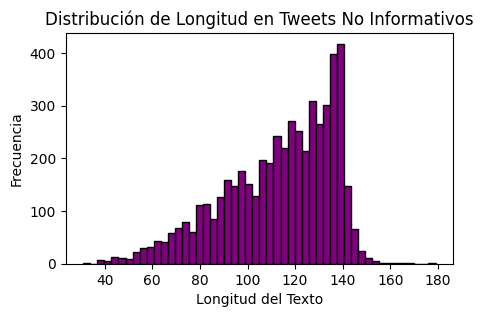

In [95]:
# Gráficos de distribución de las características

# Distribución de la longitud del texto
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['text_length'], bins=50, color='purple', edgecolor='black')
plt.title('Distribución de Longitud en Tweets No Informativos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

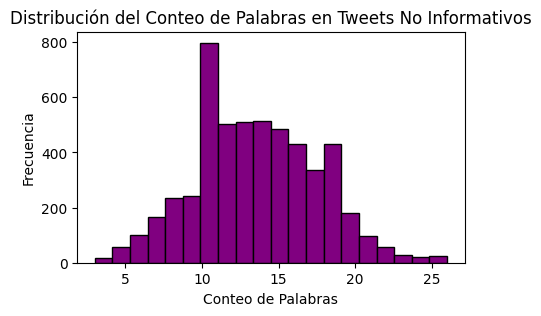

In [97]:
# Distribución del conteo de palabras
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['word_count'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Palabras en Tweets No Informativos')
plt.xlabel('Conteo de Palabras')
plt.ylabel('Frecuencia')
plt.show()

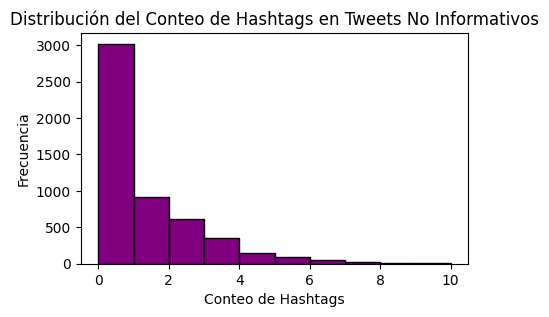

In [99]:
# Distribución del conteo de hashtags
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['hashtag_count'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Hashtags en Tweets No Informativos')
plt.xlabel('Conteo de Hashtags')
plt.ylabel('Frecuencia')
plt.show()

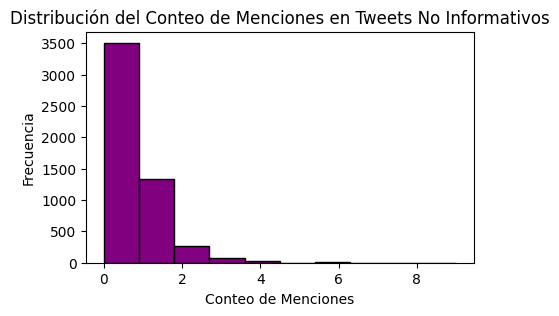

In [100]:
# Distribución del conteo de menciones
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['mention_count'], color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Menciones en Tweets No Informativos')
plt.xlabel('Conteo de Menciones')
plt.ylabel('Frecuencia')
plt.show()

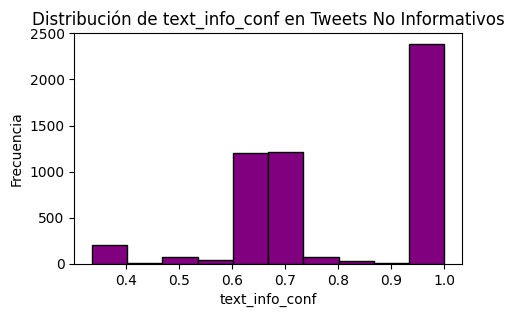

In [107]:
# Distribución de text_info_conf
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['text_info_conf'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución de text_info_conf en Tweets No Informativos')
plt.xlabel('text_info_conf')
plt.ylabel('Frecuencia')
plt.show()

In [102]:
# Conteo total de tweets no informativos
total_non_informative_tweets = df_non_informative.shape[0]
print("Número total de tweets no informativos:", total_non_informative_tweets)

# Conteo de tweets no informativos con URL
has_url = df_non_informative['has_url'].value_counts()[1]
print("\nNúmero de tweets no informativos con URL:", has_url)
percent_with_url = has_url / total_non_informative_tweets
print(f"Porcentaje de tweets no informativos con URL: {percent_with_url:.2%}")

# Conteo de retweets no informativos
retweets = df_non_informative['rt'].value_counts()[1]
print("\nNúmero de retweets no informativos:", retweets)
percent_retweets = retweets / total_non_informative_tweets
print(f"Porcentaje de retweets no informativos: {percent_retweets:.2%}")

# Conteo de tweets no informativos con hashtags
no_hashtags = df_non_informative['hashtag_count'].value_counts()[0]
tweets_with_hashtags = total_non_informative_tweets - no_hashtags
print("\nNúmero de tweets no informativos con hashtags:", tweets_with_hashtags)
percent_with_hashtags = tweets_with_hashtags / total_non_informative_tweets
print(f"Porcentaje de tweets no informativos con hashtags: {percent_with_hashtags:.2%}")


Número total de tweets no informativos: 5227

Número de tweets no informativos con URL: 5226
Porcentaje de tweets no informativos con URL: 99.98%

Número de retweets no informativos: 709
Porcentaje de retweets no informativos: 13.56%

Número de tweets no informativos con hashtags: 2206
Porcentaje de tweets no informativos con hashtags: 42.20%


Análisis en conjunto

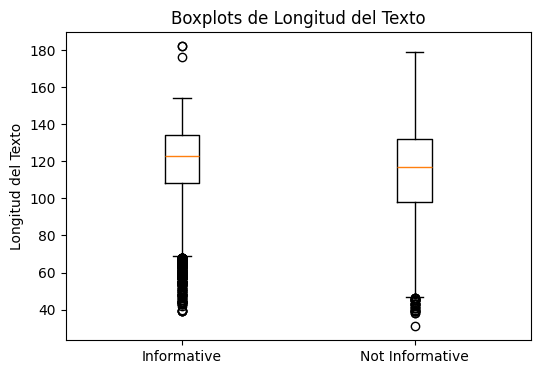

In [111]:
# Boxplots para longitud
plt.figure(figsize=(6, 4))
plt.boxplot([df_informative['text_length'], df_non_informative['text_length']], tick_labels=['Informative', 'Not Informative'])
plt.title('Boxplots de Longitud del Texto')
plt.ylabel('Longitud del Texto')
plt.show()

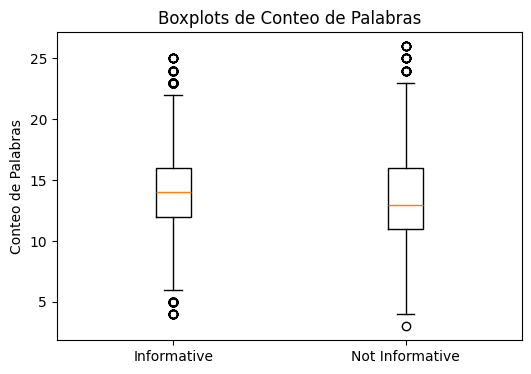

In [112]:
# Boxplot para conteo de palabras
plt.figure(figsize=(6, 4))
plt.boxplot([df_informative['word_count'], df_non_informative['word_count']], tick_labels=['Informative', 'Not Informative'])
plt.title('Boxplots de Conteo de Palabras')
plt.ylabel('Conteo de Palabras')
plt.show()

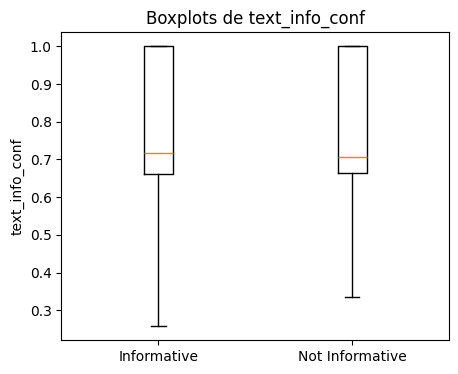

In [110]:
# Boxplots para text_info_conf
plt.figure(figsize=(5, 4))
plt.boxplot([df_informative['text_info_conf'], df_non_informative['text_info_conf']], tick_labels=['Informative', 'Not Informative'])
plt.title('Boxplots de text_info_conf')
plt.ylabel('text_info_conf')
plt.show()